In [1]:
import pandas as pd
df = pd.read_csv('demo10100.csv') #textual data
with pd.option_context('display.max_rows',50, 'display.max_columns', 50):
    display(df.head())
    
print('Demo shape: {} Rows, {} Columns'.format(*df.shape))

import nltk
nltk.download('stopwords')
import time
notebookstart= time.time()
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
# Models Packages
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Gradient Boosting
import lightgbm as lgb

# Tf-Idf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from scipy.sparse import hstack, csr_matrix
from nltk.corpus import stopwords
from string import punctuation

#HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Viz
import seaborn as sns
import matplotlib.pyplot as plt


,Unnamed: 0,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,id,dullness,whiteness,average_pixel_width,blurrness,resnet50_score
0,0,e04828936fc5,2fce002a0d21,Пермский край,Кунгур,Бытовая электроника,Телефоны,Samsung,NaN,NaN,Samsung galaxy s2 на запчасти,Samsung galaxy s2 на запчасти. Неисправна память.,500.0,21,2017-03-28,Private,00d4b4267560d6db37b24c3b6f6390d414f177fb8b70c9...,2932.0,0.76786,3314,84.56,0.00,4.33,632.23,0.43
1,1,9b663721150e,715477fb76ad,Владимирская область,Владимир,Для дома и дачи,Бытовая техника,Для кухни,Холодильники и морозильные камеры,NaN,Холодильник однокамерный pozis - RS411,"Новый, габариты 850х540х550",10000.0,2,2017-03-21,Private,005b26f685f0775460419064a977642f8b305fab46b239...,1884.0,0.00000,3002,0.00,0.00,1.48,453.89,0.39
2,2,dd768b311a3a,de5e9cda4fb7,Красноярский край,Красноярск,Бытовая электроника,Товары для компьютера,Комплектующие,Жёсткие диски,NaN,Продам hdd,продам hdd 1000tb есть 3 переназначеных сектор...,1550.0,129,2017-03-18,Company,01294414ab83bcf6a288a330c66cedba61a047f970d036...,2860.0,0.00000,1797,0.00,87.59,3.98,1654.58,1.00
3,3,45a4b99b56a5,d7b6b7b7bd2a,Тульская область,Тула,Услуги,Предложение услуг,Другое,NaN,NaN,Такелажные работы,"Выполняем такелажные работы. Погрузка, разгруз...",NaN,2,2017-03-15,Private,01d6dbc1125760a39a29195754ba7c02caa6998634ecd6...,1283.0,0.00000,4791,20.49,44.58,4.38,518.58,0.46
4,4,a23da558a1ea,54a570932c79,Омская область,Омск,Личные вещи,Товары для детей и игрушки,Товары для кормления,NaN,NaN,Стул для кормления,Продам стул для кормления. В хорошем состоянии...,1500.0,12,2017-03-21,Private,006483c6a6fe0310307a160b44091a68884101e2eb74ce...,811.0,0.00000,8583,1.08,87.29,4.26,383.30,0.47


Demo shape: 10100 Rows, 25 Columns
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/projectMachine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
print("\nData Load Stage")
df = pd.read_csv('demo10100.csv',parse_dates = ["activation_date"])
df_index = df.index
print(df_index)

#testing = pd.read_csv('test.csv',parse_dates = ["activation_date"])
#testdex = testing.index
#test_item = testing['item_id']

y = df['deal_probability'].copy()
df.drop("deal_probability",axis=1, inplace=True)

#print('Train shape: {} Rows, {} Columns'.format(*training.shape))
#print('Test shape: {} Rows, {} Columns'.format(*testing.shape))

df["price"] = np.log(df["price"]+0.001)               # filling in NaN's
df["price"].fillna(-999,inplace=True)
df["image_top_1"].fillna(-999,inplace=True)
df['param_1'].fillna('fill',inplace=True)
df['param_2'].fillna('fill',inplace=True)
df['param_3'].fillna('fill',inplace=True)

df["Weekday"] = df['activation_date'].dt.weekday
df["Weekd of Year"] = df['activation_date'].dt.week
df["Day of Month"] = df['activation_date'].dt.day

import nltk
nltk.download('stopwords')

russian_stop = set(stopwords.words('russian','fill'))

df['desc_punctuation_cnt'] = df['description'].apply(lambda x: len("".join(_ for _ in str(x) if _ in punctuation)))
df['desc_upper_case_word_cnt'] = df['description'].apply(lambda x: len([wrd for wrd in str(x).split() if wrd.isupper()]))
df['stopword_count'] = df['description'].apply(lambda x: len([wrd for wrd in str(x).split() if wrd.lower() in russian_stop]))

df.drop(["activation_date","image"],axis=1,inplace=True)



Data Load Stage
RangeIndex(start=0, stop=10100, step=1)
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/projectMachine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
print("\nEncode Variables")
categorical = ["region","city","parent_category_name","category_name","user_type","image_top_1"]
print("Encoding :",categorical)

# Encoder:
lbl = preprocessing.LabelEncoder()
for col in categorical:
    df[col] = lbl.fit_transform(df[col].astype(str))

df['text_feat'] = df.apply(lambda row: ' '.join([
    str(row['param_1']),
    str(row['param_2']),
    str(row['param_3'])]),axis=1) # Group Param Features into a single string

df.drop(["param_1","param_2","param_3"],axis=1,inplace=True)


textfeats = ["description","text_feat", "title"]

for cols in textfeats:
    df[cols] = df[cols].astype(str)
    df[cols] = df[cols].astype(str).fillna('nicapotato') # WHY FILL NANS WITH NICAPOTATO?
    df[cols] = df[cols].str.lower() # Lowercase all text, so that capitalized words dont get treated differently

    df[cols + '_num_chars'] = df[cols].apply(len) # Count number of Characters
    df[cols + '_num_words'] = df[cols].apply(lambda comment: len(comment.split())) # Count number of Words
    df[cols + '_num_unique_words'] = df[cols].apply(lambda comment: len(set(w for w in comment.split())))
    df[cols + '_words_vs_unique'] = df[cols+'_num_unique_words'] / df[cols+'_num_words'] * 100 # Count Unique Words



Encode Variables
Encoding : ['region', 'city', 'parent_category_name', 'category_name', 'user_type', 'image_top_1']


In [4]:
tfidf_para = {
    "stop_words": russian_stop,
    "analyzer": 'word',
    "token_pattern": r'\w{1,}',
    "sublinear_tf": True,
    "dtype": np.float32,
    "norm": 'l2',
    #"min_df":5,
    #"max_df":.9,
    "smooth_idf":False
}


def get_col(col_name): return lambda x: x[col_name]

vectorizer = FeatureUnion([
        ('description',TfidfVectorizer(
            ngram_range=(1, 2),
            max_features=16000,
            **tfidf_para,
            preprocessor=get_col('description'))),
        ('text_feat',CountVectorizer(
            ngram_range=(1, 2),
            max_features=5000,
            preprocessor=get_col('text_feat'))),
        ('title',TfidfVectorizer(
            ngram_range=(1, 2),
            **tfidf_para,
            max_features=5000,
            preprocessor=get_col('title')))
    ])


start_vect=time.time()
vectorizer.fit(df.to_dict('records'))

ready_df = vectorizer.transform(df.to_dict('records'))
print(ready_df.shape[0])

10100


In [5]:
tfvocab = vectorizer.get_feature_names()
print("Vectorization Runtime: %0.2f Minutes"%((time.time() - start_vect)/60))

df.drop(['item_id','description','title','text_feat'],axis=1,inplace=True)

df.drop('user_id',axis=1,inplace=True)

Vectorization Runtime: 0.05 Minutes


In [6]:
with pd.option_context('display.max_rows',50, 'display.max_columns', 50):
    display(df.head())

,Unnamed: 0,region,city,parent_category_name,category_name,price,item_seq_number,user_type,image_top_1,id,dullness,whiteness,average_pixel_width,blurrness,resnet50_score,Weekday,Weekd of Year,Day of Month,desc_punctuation_cnt,desc_upper_case_word_cnt,stopword_count,description_num_chars,description_num_words,description_num_unique_words,description_words_vs_unique,text_feat_num_chars,text_feat_num_words,text_feat_num_unique_words,text_feat_words_vs_unique,title_num_chars,title_num_words,title_num_unique_words,title_words_vs_unique
0,0,15,256,0,40,6.214610,21,1,1311,3314,84.56,0.00,4.33,632.23,0.43,1,13,28,2,0,1,49,7,7,100.000000,17,3,2,66.666667,29,5,5,100.0
1,1,3,102,2,4,9.210340,2,1,667,3002,0.00,0.00,1.48,453.89,0.39,1,12,21,1,0,0,27,3,3,100.000000,48,7,7,100.000000,38,5,5,100.0
2,2,10,241,0,43,7.346011,129,0,1246,1797,0.00,87.59,3.98,1654.58,1.00,5,11,18,2,0,6,128,23,22,95.652174,32,4,4,100.000000,10,2,2,100.0
3,3,22,478,7,33,-999.000000,2,1,228,4791,20.49,44.58,4.38,518.58,0.46,2,11,15,13,0,8,367,45,41,91.111111,16,3,2,66.666667,17,2,2,100.0
4,4,13,354,4,41,7.313221,12,1,1824,8583,1.08,87.29,4.26,383.30,0.47,1,12,21,3,1,2,66,9,9,100.000000,30,5,4,80.000000,18,3,3,100.0


In [7]:
df.drop(['Unnamed: 0','Weekday','Weekd of Year','Day of Month','description_num_chars','title_num_chars','id'],axis=1,inplace=True)

with pd.option_context('display.max_rows',50, 'display.max_columns', 50):
    display(df.head())
print(df.shape)

,region,city,parent_category_name,category_name,price,item_seq_number,user_type,image_top_1,dullness,whiteness,average_pixel_width,blurrness,resnet50_score,desc_punctuation_cnt,desc_upper_case_word_cnt,stopword_count,description_num_words,description_num_unique_words,description_words_vs_unique,text_feat_num_chars,text_feat_num_words,text_feat_num_unique_words,text_feat_words_vs_unique,title_num_words,title_num_unique_words,title_words_vs_unique
0,15,256,0,40,6.214610,21,1,1311,84.56,0.00,4.33,632.23,0.43,2,0,1,7,7,100.000000,17,3,2,66.666667,5,5,100.0
1,3,102,2,4,9.210340,2,1,667,0.00,0.00,1.48,453.89,0.39,1,0,0,3,3,100.000000,48,7,7,100.000000,5,5,100.0
2,10,241,0,43,7.346011,129,0,1246,0.00,87.59,3.98,1654.58,1.00,2,0,6,23,22,95.652174,32,4,4,100.000000,2,2,100.0
3,22,478,7,33,-999.000000,2,1,228,20.49,44.58,4.38,518.58,0.46,13,0,8,45,41,91.111111,16,3,2,66.666667,2,2,100.0
4,13,354,4,41,7.313221,12,1,1824,1.08,87.29,4.26,383.30,0.47,3,1,2,9,9,100.000000,30,5,4,80.000000,3,3,100.0


(10100, 26)


In [8]:
print("Modeling Stage")
#Combine Dense Features with Sparse Text Bag of Words Features
X = hstack([csr_matrix(df.loc[df_index,:].values),ready_df[:df_index.shape[0]]]) # Sparse Matrix

#testing = hstack([csr_matrix(df.loc[testdex,:].values),ready_df[traindex.shape[0]:]])

tfvocab = df.columns.tolist() + tfvocab

for shape in [X]:
    print("{} Rows and {} Cols".format(*shape.shape))

print("Feature Names Length: ",len(tfvocab))
#del df
gc.collect();

Modeling Stage
10100 Rows and 23022 Cols
Feature Names Length:  23022


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=100, random_state=23)

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=False)
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


In [11]:
print("Light Gradient Boosting Regressor")
lgbm_params =  {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'max_depth': 25,
    'num_leaves': 37,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'learning_rate': 0.020,
    'num_iterations': 300,
    'verbose': 0,
    'lambda_l1': 0.7
}

Light Gradient Boosting Regressor


In [12]:
lgtrain = lgb.Dataset(X_train_scaled, y_train,
                feature_name=tfvocab,
                categorical_feature = categorical,
                free_raw_data=False)
lgvalid = lgb.Dataset(X_valid, y_valid,
                feature_name=tfvocab,
                categorical_feature = categorical)

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt

modelstart = time.time()

lgb_clf = lgb.train(
    lgbm_params,
    lgtrain,
    num_boost_round=16000,
    #valid_sets=[lgtrain],
    #valid_names=['train'],
    #early_stopping_rounds=200,
    #verbose_eval=200
)
lgb_predicted = lgb_clf.predict(X_test_scaled)
lgb_rms = sqrt(mean_squared_error(y_test, lgb_predicted))
print("Model training took " + str(time.time() - modelstart))
print(lgb_rms)

/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/engine.py:111: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Model training took 2.6589739322662354
0.22562979175519748


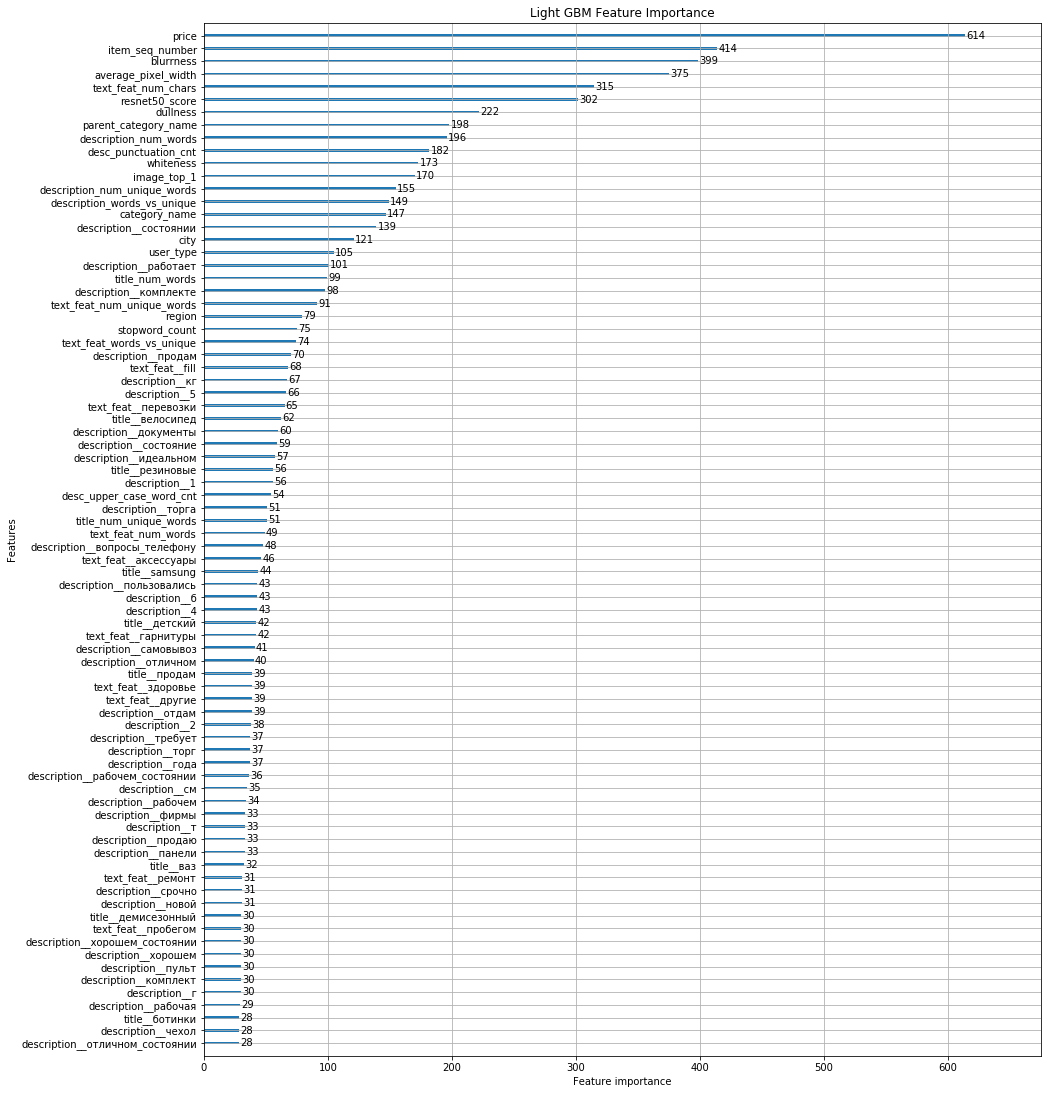

In [14]:
# Feature Importance Plot
f, ax = plt.subplots(figsize=[15,19])
lgb.plot_importance(lgb_clf, max_num_features=80, ax=ax)
plt.title("Light GBM Feature Importance")
plt.show()

In [15]:
print(pd.DataFrame({
        'column': tfvocab,
        'importance': lgb_clf.feature_importance(),
    }).sort_values(by='importance',ascending=False))


                                   column  importance
4                                   price         614
5                         item_seq_number         414
11                              blurrness         399
10                    average_pixel_width         375
19                    text_feat_num_chars         315
12                         resnet50_score         302
8                                dullness         222
2                    parent_category_name         198
16                  description_num_words         196
13                   desc_punctuation_cnt         182
9                               whiteness         173
7                             image_top_1         170
17           description_num_unique_words         155
18            description_words_vs_unique         149
3                           category_name         147
13819              description__состоянии         139
1                                    city         121
6                           

In [16]:
feature_name = pd.DataFrame({
        'column': tfvocab,
        'importance': lgb_clf.feature_importance(),
    }).sort_values(by='importance',ascending=False)

In [17]:
#feature_name.to_csv('feature_name.csv',index_label = 'id')
feature_id = pd.read_csv('feature_2.csv',header = None)
#print(feature_id)

In [18]:
#print(feature_id)
feature_id_test = feature_id[0]
feature_name_test = feature_id[1]
#print(feature_id_test)

#print(feature_name_test)

In [19]:
id_im = []
for i in feature_id_test:
    id_im.append(i)
print(len(id_im))

name_im = []
for i in feature_name_test:
    name_im.append(i)
print(len(name_im))


23022
23022


In [20]:
f_im = pd.DataFrame(X.toarray())
X2 = f_im[id_im].values


In [28]:
#print(X2)
print(X2.shape)


(10100, 23022)


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
ss = StandardScaler(with_mean=False)

for i in range(50,1000,50):
    X2_1 = X2[:,:i]
    feat_name = name_im[:i]
    #print(i)
    X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_1, y, test_size=100, random_state=23)
    X2_train_scaled = ss.fit_transform(X2_train)
    X2_test_scaled = ss.transform(X2_test)
    lgtrain2 = lgb.Dataset(X2_train_scaled, y2_train,
                feature_name=feat_name,
                categorical_feature = categorical,
                free_raw_data=False)
    lgb_clf2 = lgb.train(
    lgbm_params,
    lgtrain2,
    num_boost_round=16000
)
    lgb_predicted2 = lgb_clf2.predict(X2_test_scaled)
    lgb_rms2 = sqrt(mean_squared_error(y2_test, lgb_predicted2))
    print(i,lgb_rms2)

/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


50 0.23998051510841975


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


100 0.2194124435136309


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


150 0.22510068301594957


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


200 0.2190613964563095


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


250 0.21901193112309875


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


300 0.21547522938814984


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


350 0.21406109427806908


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


400 0.21833979370490883


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


450 0.219923229239501


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


500 0.21682730858077323


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


550 0.2222173399319208


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


600 0.22051557031396882


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


650 0.21764990130743128


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


700 0.21874316403869212


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


750 0.22033096379297867


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


800 0.21829739377156787


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


850 0.21861878883635705


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


900 0.21957052374327646


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


950 0.220895791437566


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
ss = StandardScaler(with_mean=False)
for i in range(1000,10000,1000):
    X2_1 = X2[:,:i]
    feat_name = name_im[:i]
    #print(i)
    X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_1, y, test_size=100, random_state=23)
    X2_train_scaled = ss.fit_transform(X2_train)
    X2_test_scaled = ss.transform(X2_test)
    lgtrain2 = lgb.Dataset(X2_train_scaled, y2_train,
                feature_name=feat_name,
                categorical_feature = categorical,
                free_raw_data=False)
    lgb_clf2 = lgb.train(
    lgbm_params,
    lgtrain2,
    num_boost_round=16000
)
    lgb_predicted2 = lgb_clf2.predict(X2_test_scaled)
    lgb_rms2 = sqrt(mean_squared_error(y2_test, lgb_predicted2))
    print(i,lgb_rms2)

/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


1000 0.22483891297631972


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


2000 0.219923695154562


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


3000 0.22318446039887893


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


4000 0.2217237430901339


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


5000 0.2230070032120942


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


6000 0.22066343419302475


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


7000 0.21800436759678432


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


8000 0.2235722357788029


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


9000 0.2191921990570205


In [29]:
from math import sqrt
ss = StandardScaler(with_mean=False)
for i in [10000,15000,20000,23000]:
    X2_1 = X2[:,:i]
    feat_name = name_im[:i]
    #print(i)
    X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_1, y, test_size=100, random_state=23)
    X2_train_scaled = ss.fit_transform(X2_train)
    X2_test_scaled = ss.transform(X2_test)
    lgtrain2 = lgb.Dataset(X2_train_scaled, y2_train,
                feature_name=feat_name,
                categorical_feature = categorical,
                free_raw_data=False)
    lgb_clf2 = lgb.train(
    lgbm_params,
    lgtrain2,
    num_boost_round=16000
)
    lgb_predicted2 = lgb_clf2.predict(X2_test_scaled)
    lgb_rms2 = sqrt(mean_squared_error(y2_test, lgb_predicted2))
    print(i,lgb_rms2)

/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


10000 0.22364000354473926


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


15000 0.224530352801258


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


20000 0.2231941741745332


/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:1158: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/basic.py:725: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


23000 0.22493611041271577
